In [8]:
import pickle
import numpy as np
import pandas as pd

In [14]:
data_folder = '../data/'

item_ratings_df = pd.read_csv(data_folder + 'user_ratings.csv')

In [4]:
filename = '../group_data/clusters_ids.npy'
clusters_ids = np.load(filename, allow_pickle=True)

In [78]:
mean_std_list = []
median_std_list = []
fractions = []

for current_cluster in clusters_ids:
    
    current_clister_ratings = item_ratings_df[item_ratings_df['Username'].isin(current_cluster)]
    
    grouped_current_clister_ratings = current_clister_ratings.groupby(by = ['Username']).agg({
        'BGGId' : list
    }).reset_index()
    
    games_list = list(grouped_current_clister_ratings['BGGId'])
    
    total_games = []
    for game in games_list:
        total_games = np.union1d(total_games, game)
        
    current_agg = current_clister_ratings.groupby('BGGId').agg(
        count_similar_games = ('BGGId','count'),
        stg_ratings = ('Rating','std')
    )
    
    current_agg = current_agg[current_agg['count_similar_games'] > 1]
    itersection_items = current_agg.shape[0]
    mean_std = np.array(list(current_agg['stg_ratings'])).mean()
    median_std = np.median(np.array(list(current_agg['stg_ratings'])))
    
    mean_std_list.append(mean_std)
    median_std_list.append(median_std)
    fractions.append(itersection_items/len(total_games))

In [79]:
mean_std_list

[1.2262681042881736,
 1.1930722053986442,
 1.1970343752881047,
 1.1477665873097176,
 0.9391087345130904,
 1.0640931640979137,
 1.166000637187707,
 1.060544537189612,
 1.1253435985805111,
 0.9709631730665812,
 1.0686447050846688,
 1.0993589791533696,
 0.8338492838652557,
 0.5738948969287886,
 0.966767460717018,
 0.9723320621537275,
 0.619176649248124,
 1.139377300840843,
 1.2049321420308303,
 0.9537594754527736,
 1.0201308000160452,
 1.156327361963259,
 1.0867895628457787,
 0.8624988763766549,
 1.0499404617346462,
 1.2855826677795392,
 0.7985174709849451,
 0.7841756401714575,
 1.27506715723559,
 1.4117223910572285,
 1.053236774596801,
 1.3495055011866712,
 0.5340052890576603,
 1.0911673582573467,
 1.078692366169485,
 0.9414269802347237,
 0.8981835675182975,
 1.0129453311402568,
 1.1779137557475976,
 0.9532304129045509,
 0.8051947042658435,
 1.2519357789537842,
 0.9666128686031026,
 1.155163932467932,
 0.7820306307107152,
 0.9363332420746068,
 0.6697638188551039,
 1.105418769398089,
 1.0

In [80]:
median_std_list

[1.2583057392117916,
 1.0606601717798212,
 1.1547005383792515,
 1.0606601717798212,
 0.7637626158259734,
 0.8944271909999156,
 1.1402632152270809,
 0.9616652224137052,
 1.0408329997330663,
 0.7071067811865476,
 0.9574271077563381,
 1.0,
 0.7071067811865476,
 0.49497474683058307,
 0.8838834764831844,
 0.7071067811865476,
 0.7071067811865476,
 1.0,
 1.0606601717798212,
 0.7544313531837513,
 0.8539125638299665,
 0.9949747468305834,
 1.0041549357286073,
 0.7071067811865476,
 0.9682243187822317,
 1.2449899597988732,
 0.7071067811865476,
 0.7071067811865476,
 1.1086778913041726,
 1.4142135623730951,
 0.9899494936611664,
 1.2909944487358056,
 0.7071067811865476,
 1.0307764064044151,
 0.9160548723588942,
 0.7637626158259734,
 0.7071067811865476,
 0.8539125638299666,
 0.7071067811865476,
 0.7637626158259733,
 0.7071067811865476,
 1.0606601717798212,
 0.721110255092798,
 1.0408329997330663,
 0.7071067811865476,
 0.7637626158259734,
 0.5656854249492376,
 1.0606601717798212,
 0.8660254037844386,
 

In [81]:
fractions

[0.3787772312016866,
 0.34054054054054056,
 0.36950314106225013,
 0.3835688121402407,
 0.4040876631371583,
 0.3498567335243553,
 0.27789661319073083,
 0.3761047463175123,
 0.3641278796426892,
 0.24936535832845147,
 0.3408284023668639,
 0.3086662300807684,
 0.4514635356375062,
 0.13177523620089507,
 0.3246268656716418,
 0.14164004259850904,
 0.20025456088247773,
 0.27656929770043504,
 0.37604082728982,
 0.34973544973544973,
 0.3407608695652174,
 0.21646942800788954,
 0.39366754617414246,
 0.2751971954425942,
 0.37497048406139316,
 0.3560642961519727,
 0.3134114955676294,
 0.14816310052482842,
 0.40988056460369166,
 0.41350623929532665,
 0.3776390127862028,
 0.42075413856529736,
 0.3218511701288456,
 0.3305592543275632,
 0.31431726168568275,
 0.384426732066217,
 0.33480176211453744,
 0.3219675796534377,
 0.09850107066381156,
 0.3651861821444594,
 0.3537723273793655,
 0.2702606212067119,
 0.3776550552251487,
 0.28847435043304465,
 0.17988394584139264,
 0.31253841425937307,
 0.290086206896

In [82]:
import matplotlib.pyplot as plt

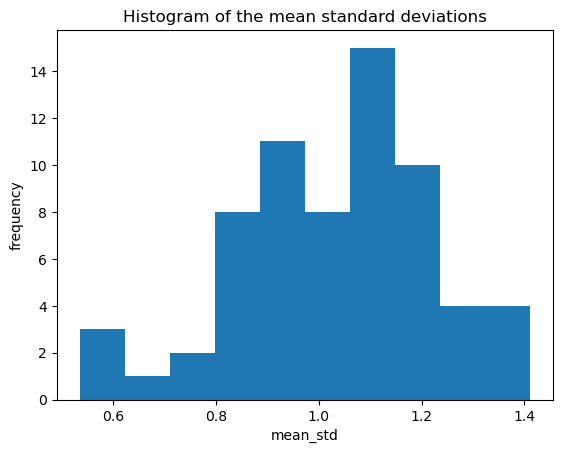

In [84]:
plt.hist(mean_std_list)

# Adding labels and title
plt.xlabel('mean_std')
plt.ylabel('frequency')
plt.title('Histogram of the mean standard deviations')

plt.show()

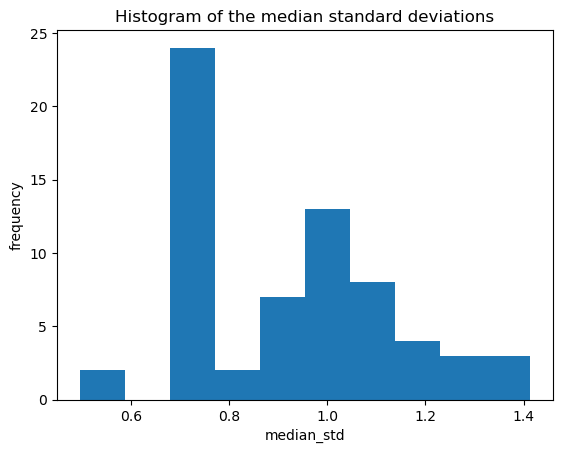

In [85]:
plt.hist(median_std_list)

# Adding labels and title
plt.xlabel('median_std')
plt.ylabel('frequency')
plt.title('Histogram of the median standard deviations')

plt.show()

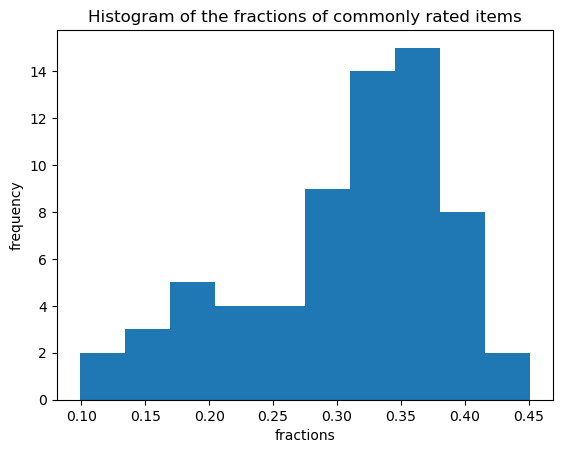

In [86]:
plt.hist(fractions)

# Adding labels and title
plt.xlabel('fractions')
plt.ylabel('frequency')
plt.title('Histogram of the fractions of commonly rated items')

plt.show()